In [15]:
#pip install matplotlib
#pip install nltk
#pip install wordcloud
#pip install pandas

In [2]:
# import necessary libraries
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from collections import Counter
import re
from wordcloud import WordCloud
nltk.download('stopwords')


df = pd.read_csv("cornell_2019_sampled.csv")
df['year'] = 2019

df

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tianyuanpei/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Unnamed: 0,body,emo_pred_pos,emo_pred_neu,emo_pred_neg,year
0,0,Walk,0.1892,0.6907,0.1201,2019
1,1,"Haha, didn't you sell me your switch two years...",0.0768,0.8144,0.1088,2019
2,2,"sweet, that sounds like a plan",0.6314,0.3402,0.0284,2019
3,3,They do warn you when they do fire inspections...,0.0272,0.6129,0.3600,2019
4,4,hmmm i see thanks. I would buy a fire proof on...,0.0887,0.4546,0.4568,2019
...,...,...,...,...,...,...
20558,20558,Wtf,0.0492,0.3474,0.6033,2019
20559,20559,What a coincidence! I am in Ithaca visiting f...,0.4982,0.4794,0.0223,2019
20560,20560,[deleted],0.0725,0.6524,0.2751,2019
20561,20561,"In my 4 years at Cornell, I don't think classe...",0.4485,0.5080,0.0435,2019


In [3]:
print(f"Row {4025}: {df.loc[4025, 'body']}\n")
print("-----------------------\n")
print(f"Row {1606}: {df.loc[1606, 'body']}\n")
print("-----------------------\n")
print(f"Row {6591}: {df.loc[6591, 'body']}\n")
print("-----------------------\n")
print(f"Row {15155}: {df.loc[15155, 'body']}\n")
print("-----------------------")


Row 4025: Intro to Near East Studies was easy, and I ended up learning a lot. If you go to most of the classes, the only work required is to study minimally for the two tests and maybe 1 day for the final (easy memorization stuff). Ik prelims can suck but these were chill, and no essays / basically no hw (&lt;2h optional reading per week) makes up for it big time

Satisfies the double GHB and HA in arts

-----------------------

Row 1606: Troshkin literally bored the fuck outta me every lecture. Also for op, 3110 is a joke with DiCiccio(bless that man), I think the class is curved to an A- and all exams were open everything.

-----------------------

Row 6591: Uhhhh at the risk of sounding like a smartass (in case this isn't a troll post), you can absolutely get by a 3.5+ in CS and still party and drink etc. OP might just be trying to rationalize their social life being below the par they set out for themselves entering college. 

If you are drowning in stress and can't seem to manage 

In [4]:
print(f"Row {1359}: {df.loc[1359, 'body']}\n")

Row 1359: [deleted]



In [5]:
print('before:', len(df))
df = df[df['body'] != '[deleted]']
print('after:', len(df))


before: 20563
after: 18867


/var/folders/g9/_yq754fd4036z7p0lpv64m3r0000gn/T/ipykernel_31148/3539669737.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment_label'] = df.apply(assign_sentiment, axis=1)


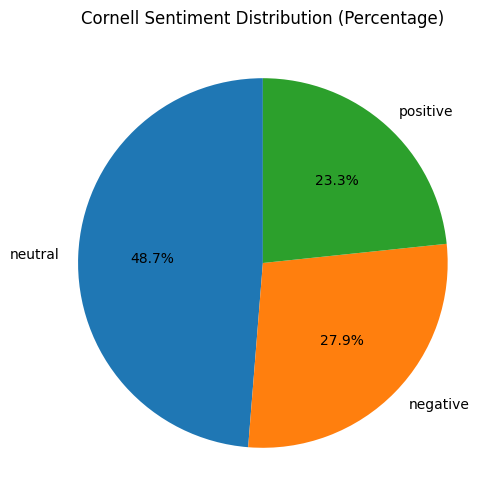

In [6]:

def assign_sentiment(row):
    sentiments = {
        'positive': row['emo_pred_pos'],
        'negative': row['emo_pred_neg'],
        'neutral': row['emo_pred_neu'],
    }
    return max(sentiments, key=sentiments.get)

df['sentiment_label'] = df.apply(assign_sentiment, axis=1)


sentiment_pct = df['sentiment_label'].value_counts(normalize=True) * 100
sentiment_pct.plot(kind='pie', autopct='%1.1f%%', startangle=90, 
                   title='Cornell Sentiment Distribution (Percentage)',
                   ylabel='', figsize=(6, 6))
plt.show()



Top Positive Words: [('good', 802), ('get', 681), ('cornell', 621), ('like', 598), ('really', 571), ('also', 551), ('class', 511), ('people', 509), ('one', 472), ('would', 426)]
Top Negative Words: [('people', 951), ('like', 888), ('get', 696), ('cornell', 679), ('think', 520), ('one', 491), ('would', 485), ('even', 436), ('know', 426), ('really', 416)]


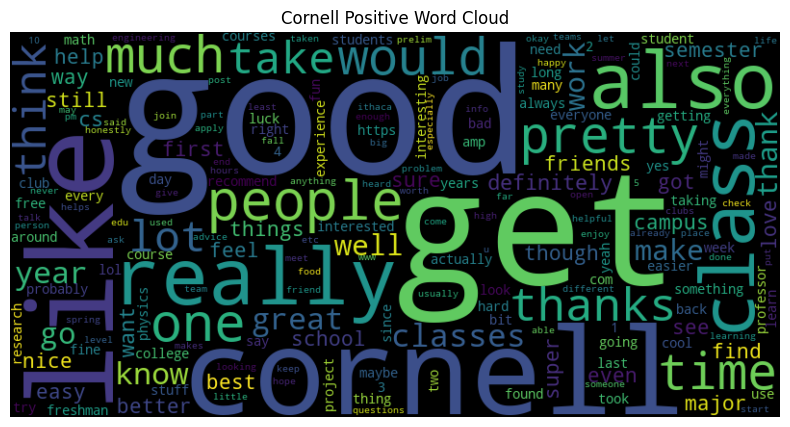

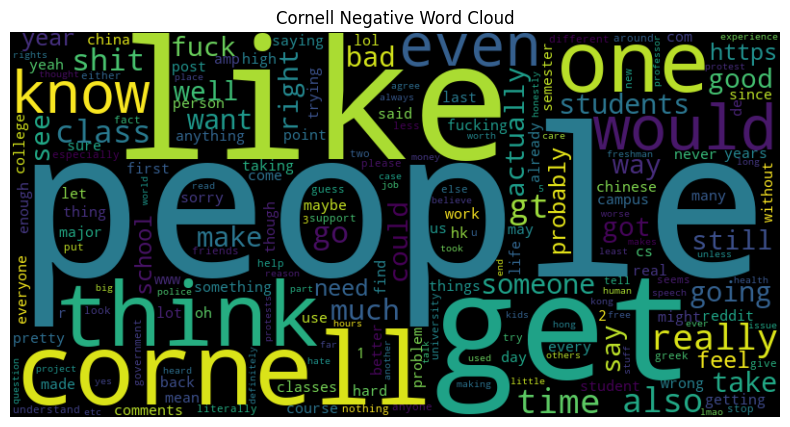

In [7]:
stop_words = set(stopwords.words('english'))
def get_words(text):
    words = re.findall(r'\b\w+\b', str(text).lower())
    return [word for word in words if word not in stop_words]

# 提取正负词频
pos_words = Counter()
neg_words = Counter()
for _, row in df.iterrows():
    words = get_words(row['body'])
    if row['sentiment_label'] == 'positive':
        pos_words.update(words)
    elif row['sentiment_label'] == 'negative':
        neg_words.update(words)

# 输出高频词
print("Top Positive Words:", pos_words.most_common(10))
print("Top Negative Words:", neg_words.most_common(10))

# 生成词云
def generate_wordcloud(counter, title):
    wc = WordCloud(width=800, height=400).generate_from_frequencies(counter)
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

generate_wordcloud(pos_words, "Cornell Positive Word Cloud")
generate_wordcloud(neg_words, "Cornell Negative Word Cloud")

In [8]:

# 加载三个年份数据，并手动添加 year 列
df_2022 = pd.read_csv('cornell_2022_sampled.csv')
df_2022['year'] = 2022
df_2022 = df_2022[df_2022['body'] != '[deleted]']


df_2020 = pd.read_csv('cornell_2020_sampled.csv')
df_2020['year'] = 2020
df_2020 = df_2020[df_2020['body'] != '[deleted]']

df_2021 = pd.read_csv('cornell_2021_sampled.csv')
df_2021['year'] = 2021
df_2021 = df_2021[df_2021['body'] != '[deleted]']

# 合并为一个总的 DataFrame
df = pd.concat([df, df_2020, df_2021, df_2022], ignore_index=True)


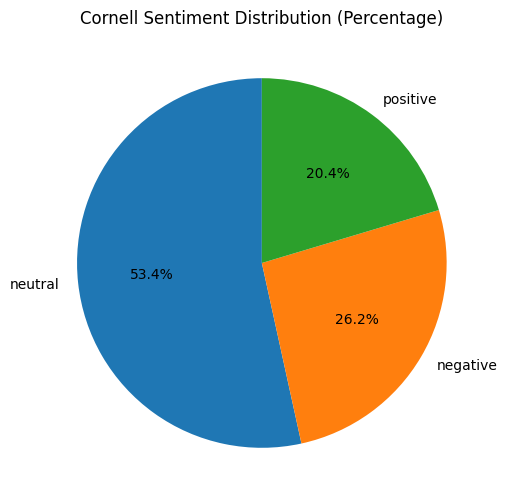

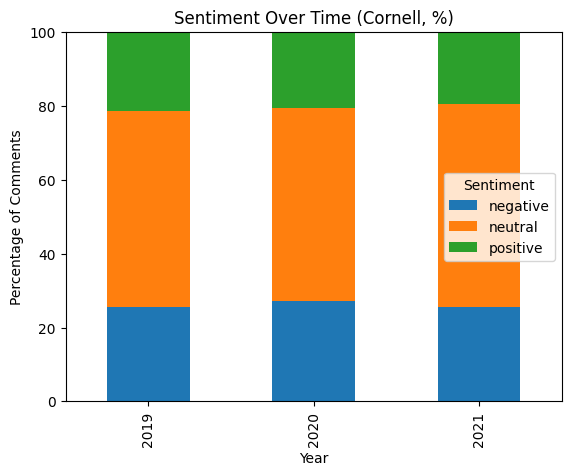

Top Positive Words: [('good', 2484), ('like', 2132), ('get', 2066), ('cornell', 1975), ('also', 1839), ('really', 1810), ('one', 1572), ('people', 1539), ('would', 1529), ('class', 1520)]
Top Negative Words: [('people', 4451), ('like', 3769), ('cornell', 3001), ('get', 2863), ('would', 2342), ('think', 2300), ('one', 2071), ('even', 1954), ('know', 1823), ('really', 1763)]


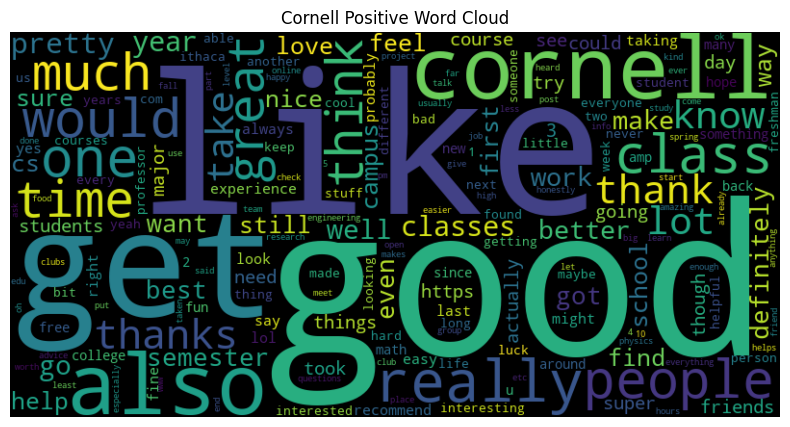

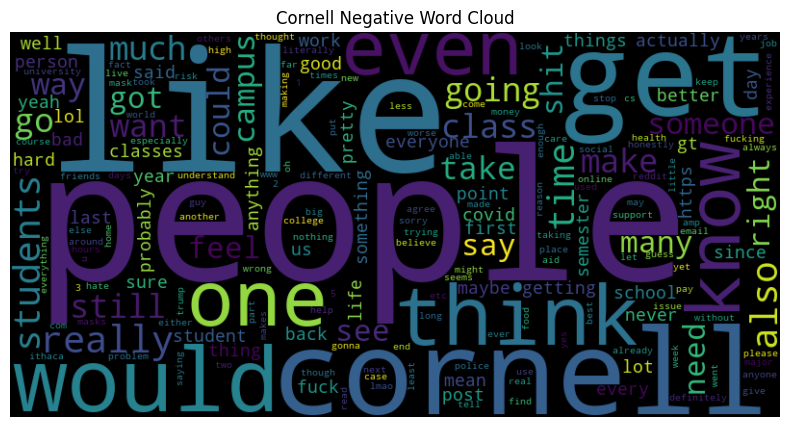

In [ ]:


# 加载合并后的 Cornell 数据
df = pd.read_csv("cornell_combined.csv")  # 修改为你合并后保存的文件名

# 如果尚未有 sentiment_label，可以自动打标签（否则略过这一行）
def assign_sentiment(row):
    sentiments = {
        'positive': row['emo_pred_pos'],
        'negative': row['emo_pred_neg'],
        'neutral': row['emo_pred_neu'],
    }
    return max(sentiments, key=sentiments.get)

if 'sentiment_label' not in df.columns:
    df['sentiment_label'] = df.apply(assign_sentiment, axis=1)


sentiment_pct = df['sentiment_label'].value_counts(normalize=True) * 100
sentiment_pct.plot(kind='pie', autopct='%1.1f%%', startangle=90, 
                   title='Cornell Sentiment Distribution (Percentage)',
                   ylabel='', figsize=(6, 6))
plt.show()


sentiment_by_year = df.groupby(['year', 'sentiment_label']).size().unstack().fillna(0)

# Convert counts to percentages per year
sentiment_by_year_pct = sentiment_by_year.div(sentiment_by_year.sum(axis=1), axis=0) * 100

# Plot
sentiment_by_year_pct.plot(kind='bar', stacked=True, title='Sentiment Over Time (Cornell, %)')
plt.xlabel('Year')
plt.ylabel('Percentage of Comments')
plt.ylim(0, 100)
plt.legend(title='Sentiment')
plt.show()

# 停用词清洗
stop_words = set(stopwords.words('english'))
def get_words(text):
    words = re.findall(r'\b\w+\b', str(text).lower())
    return [word for word in words if word not in stop_words]

# 提取正负词频
pos_words = Counter()
neg_words = Counter()
for _, row in df.iterrows():
    words = get_words(row['body'])
    if row['sentiment_label'] == 'positive':
        pos_words.update(words)
    elif row['sentiment_label'] == 'negative':
        neg_words.update(words)

# 输出高频词
print("Top Positive Words:", pos_words.most_common(10))
print("Top Negative Words:", neg_words.most_common(10))

# 生成词云
def generate_wordcloud(counter, title):
    wc = WordCloud(width=800, height=400).generate_from_frequencies(counter)
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

generate_wordcloud(pos_words, "Cornell Positive Word Cloud")
generate_wordcloud(neg_words, "Cornell Negative Word Cloud")


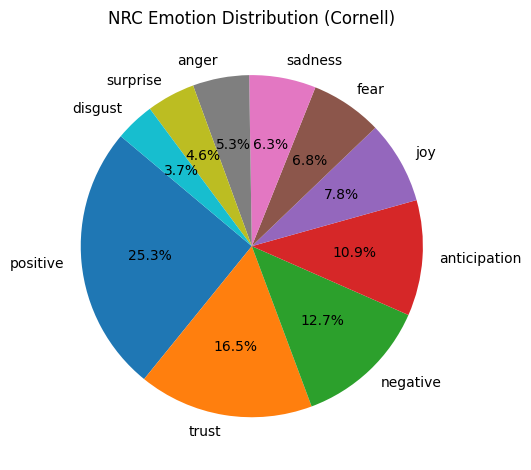

In [12]:
nrc_df = pd.read_csv("nrc_lexicon.txt", sep="\t", names=["word", "emotion", "association"])
nrc_df = nrc_df[nrc_df["association"] == 1]

from collections import defaultdict, Counter
nrc_emotion_dict = defaultdict(list)
for _, row in nrc_df.iterrows():
    nrc_emotion_dict[row["word"]].append(row["emotion"])

emotion_counter = Counter()
for text in df['body']:
    words = re.findall(r'\b\w+\b', str(text).lower())
    for word in words:
        if word in nrc_emotion_dict:
            emotion_counter.update(nrc_emotion_dict[word])


emotion_series = pd.Series(dict(emotion_counter)).sort_values(ascending=False)

# BAR PLOT
# emotion_series.plot(kind="bar", title="NRC Emotion Distribution (Cornell)")
# plt.ylabel("Frequency")
# plt.xlabel("Emotion")
# plt.tight_layout()
# plt.show()

# PIE CHART
emotion_percentages = emotion_series / emotion_series.sum() * 100
emotion_percentages.plot(
    kind="pie",
    autopct="%1.1f%%",
    title="NRC Emotion Distribution (Cornell)",
    startangle=140,
    ylabel=""  # Hide the default 'Emotion' ylabel
)

plt.tight_layout()
plt.show()


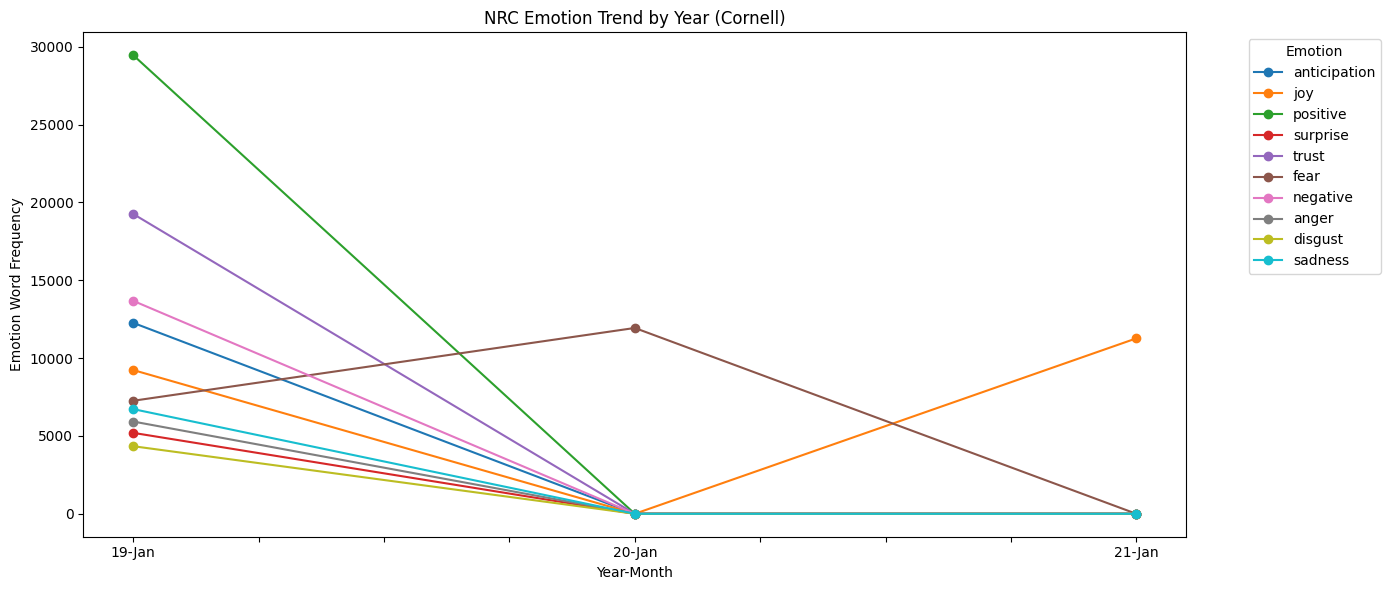

In [ ]:
nrc_df = pd.read_csv("nrc_lexicon.txt", sep="\t", names=["word", "emotion", "association"])
nrc_df = nrc_df[nrc_df["association"] == 1]  

# 构建词 -> 情绪 的映射表
nrc_emotion_dict = defaultdict(list)
for _, row in nrc_df.iterrows():
    nrc_emotion_dict[row["word"]].append(row["emotion"])

# Step 2: 构建 年份 × 情绪 的计数表
emotion_year_matrix = pd.DataFrame()

for _, row in df.iterrows():
    year = row['year']
    words = re.findall(r'\b\w+\b', str(row['body']).lower())
    emotions_this_post = Counter()
    
    for word in words:
        if word in nrc_emotion_dict:
            emotions_this_post.update(nrc_emotion_dict[word])
    
    for emotion, count in emotions_this_post.items():
        #emotion_year_matrix.loc[year, emotion] = emotion_year_matrix.get(emotion, {}).get(year, 0) + count
        current_value = emotion_year_matrix.get(emotion, {}).get(year, 0)
        emotion_year_matrix.loc[year, emotion] = current_value + count


def decimal_to_short_label(dyear):
    year = int(dyear) % 100         
    month = int((dyear - int(dyear)) * 12) + 1
    return pd.Timestamp(year=2000+year, month=month, day=1).strftime("%y-%b")

emotion_year_matrix = emotion_year_matrix.fillna(0).astype(int)
decimal_years = emotion_year_matrix.index
short_labels = [decimal_to_short_label(dy) for dy in decimal_years]
emotion_year_matrix.index = short_labels

ax = emotion_year_matrix.plot(kind='line', marker='o', figsize=(14, 6))
plt.title("NRC Emotion Trend by Year (Cornell)")
plt.xlabel("Year-Month")
plt.ylabel("Emotion Word Frequency")
plt.legend(title="Emotion", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()  